In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [4]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [5]:
data.shape()

TypeError: 'tuple' object is not callable

In [6]:
data.shape

(19735, 29)

In [7]:
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [9]:
Time=["date"]
Temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
Weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
Light = ["lights"]
Random = ["rv1", "rv2"]
Target = ["Appliances"]

In [10]:
feature = train[ Time + Temp + Hum + Weather + Light + Random ]
target = train[Target]

In [11]:
feature.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [12]:
_ = feature.drop(['lights'], axis=1 , inplace= True) ;

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
feature.head(2)

date    T1    T2     T3     T4         T5        T6  \
9544   2016-03-17 23:40:00  22.6  19.5  21.50  22.89  19.166667  2.863333   
19366  2016-05-25 04:40:00  23.7  21.0  25.39  23.60  19.890000  5.500000   

         T7     T8     T9  ...  RH_8   RH_9     T_out  Tdewpoint     RH_out  \
9544   21.0  22.89  19.89  ...  38.5  37.26  2.233333        0.4  87.666667   
19366  23.0  24.20  22.60  ...  43.4  44.59  6.266667        5.3  93.666667   

       Press_mm_hg  Windspeed  Visibility        rv1        rv2  
9544    764.200000   1.333333   61.000000  43.195492  43.195492  
19366   757.233333   1.000000   25.333333  46.369677  46.369677  

[2 rows x 27 columns]

In [14]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [ ]:
pip install chart-studio

In [15]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
data = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [18]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [20]:
Time=["date"]
Temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
Weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
Light = ["lights"]
Random = ["rv1", "rv2"]
Target = ["Appliances"]

In [21]:
feature = train[ Time + Temp + Hum + Weather + Light + Random ]
target = train[Target]

In [22]:
feature.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [23]:
_ = feature.drop(['lights'], axis=1 , inplace= True) ;

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [25]:
data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
data['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [26]:
temp_weekday =  data[data['WEEKDAY'] == 0]
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [27]:
temp_weekend =  data[data['WEEKDAY'] == 1]
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

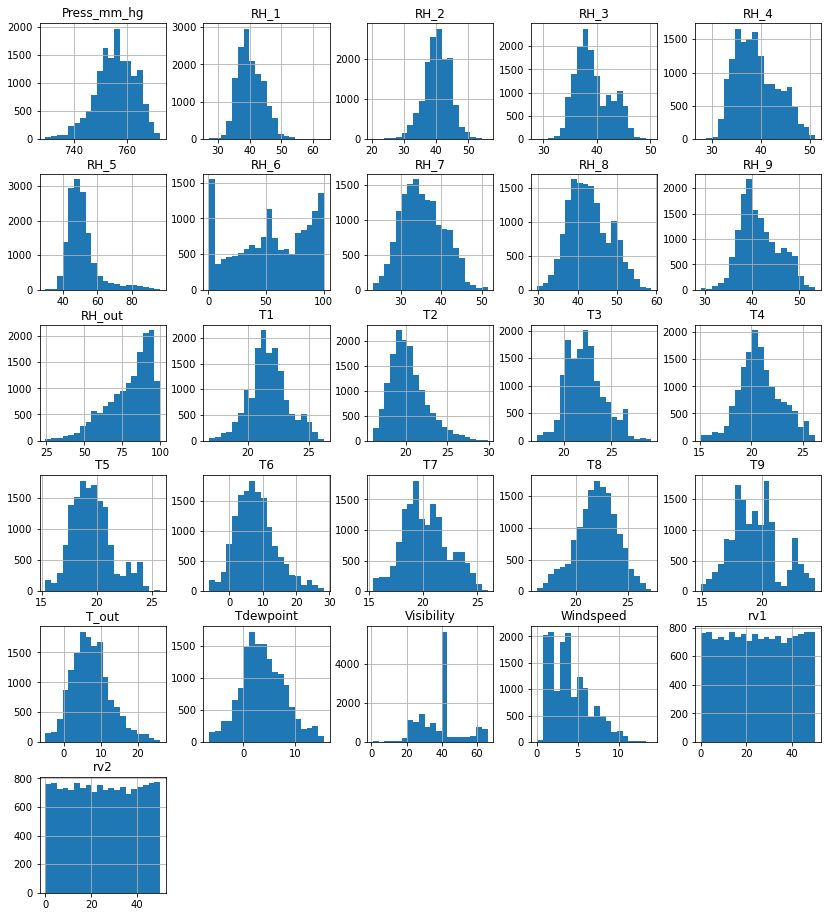

In [28]:
feature.hist(bins = 20 , figsize= (14,16)) ;

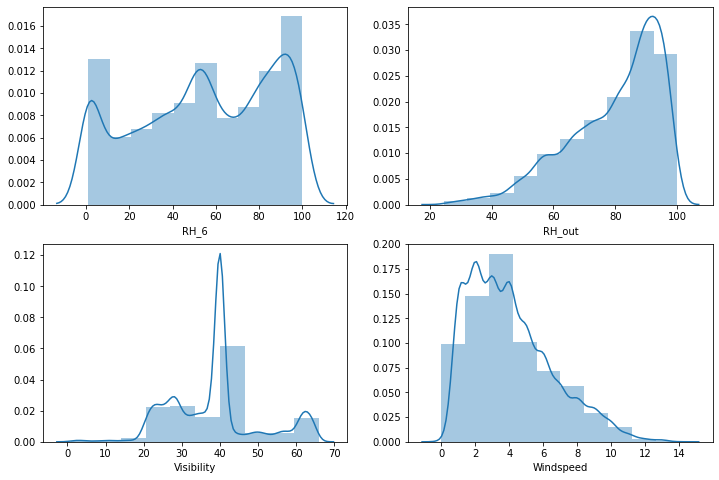

In [29]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature["Windspeed"],bins=10, ax=ax[1][1])

NameError: name 'target_vars' is not defined

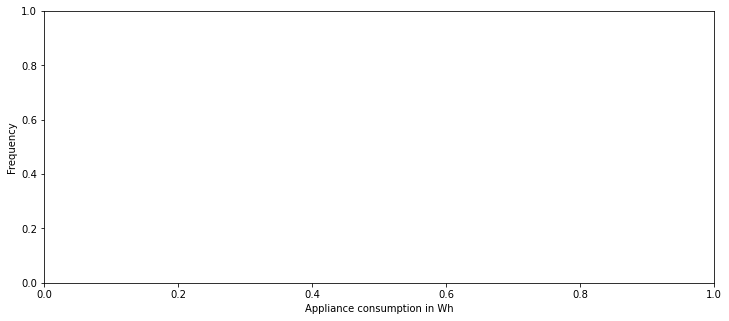

In [30]:
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [ ]:
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target , bins=10 ) ;

In [31]:
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target[target <= 200].count()) / (len(target)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


In [32]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [33]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [34]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [35]:
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [36]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
data1 = data[col_target + col_time + feature]

NameError: name 'col_target' is not defined

In [37]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
data1 = data[target + time + feature]

NameError: name 'time' is not defined

In [38]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
data1 = data[target + Time + feature]

ValueError: unknown type str128

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [40]:
df = pd.read_csv("/Users/Joshitha/Downloads/energydata_complete.csv")

In [41]:
data=df[['date','Appliances']]
data.head()

date  Appliances
0  2016-01-11 17:00:00          60
1  2016-01-11 17:10:00          60
2  2016-01-11 17:20:00          50
3  2016-01-11 17:30:00          50
4  2016-01-11 17:40:00          60

In [42]:
df.Timestamp = pd.to_datetime(df.date)

df.index = df.Timestamp
df = df.resample('D').mean()

df_month = df.resample('M').mean()
df.head()

Appliances     lights         T1       RH_1         T2       RH_2  \
date                                                                            
2016-01-11  136.666667  30.000000  20.808571  46.906210  20.153333  44.793175   
2016-01-12   85.694444   4.236111  20.092326  45.142014  19.307655  43.779733   
2016-01-13   97.013889   5.416667  19.197824  42.867772  18.568513  42.119669   
2016-01-14  151.388889   5.000000  20.372078  42.435191  19.743131  40.699172   
2016-01-15  125.347222   5.972222  22.280949  39.099294  21.528172  38.193897   

                   T3       RH_3         T4       RH_4  ...         T9  \
date                                                    ...              
2016-01-11  20.140972  45.992440  19.492222  47.260813  ...  16.918175   
2016-01-12  19.993646  44.933171  19.772778  44.556840  ...  17.032847   
2016-01-13  19.609213  43.720891  19.009803  42.315174  ...  16.953576   
2016-01-14  20.837581  43.399740  18.694271  43.231053  ...  16.884815   
2016-01-15  20.959074  41.409884  19.615127  41.961036  ...  17.345694   

                 RH_9     T_out  Press_mm_hg     RH_out  Windspeed  \
date                                                                 
2016-01-11  45.106210  5.922619   735.173810  89.285714   6.083333   
2016-01-12  45.680127  5.566319   742.628125  87.500000   5.784722   
2016-01-13  44.691476  4.856944   754.790625  83.406250   5.614583   
2016-01-14  45.428229  3.431944   749.767361  86.420139   6.277778   
2016-01-15  44.534329  2.665278   754.579861  88.385417   7.770833   

            Visibility  Tdewpoint        rv1        rv2  
date                                                     
2016-01-11   40.845238   4.228571  26.248800  26.248800  
2016-01-12   37.229167   3.596528  25.505072  25.505072  
2016-01-13   31.559028   2.169792  23.464726  23.464726  
2016-01-14   35.149306   1.316667  25.264569  25.264569  
2016-01-15   40.208333   0.849653  26.289515  26.289515  

[5 rows x 28 columns]

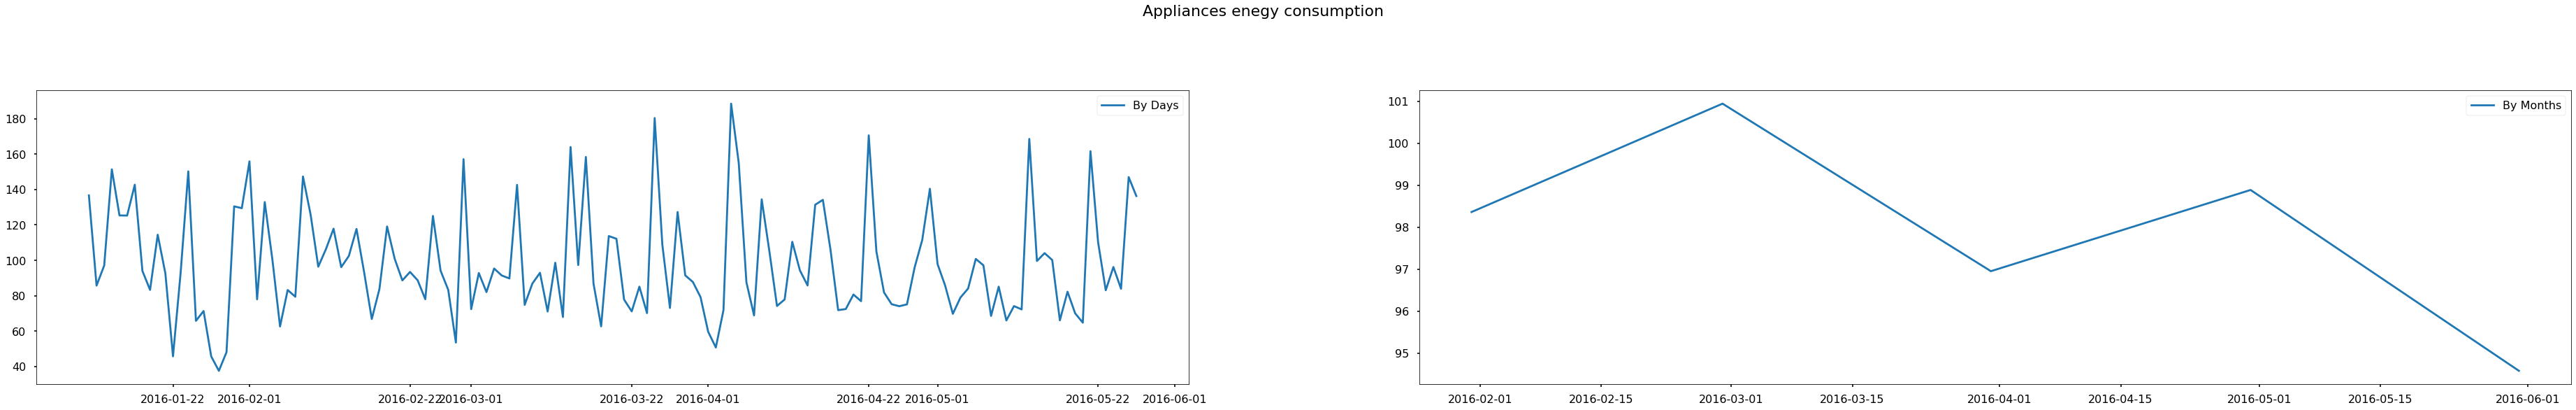

In [43]:
fig = plt.figure(figsize=[65, 17])
plt.suptitle('Appliances enegy consumption', fontsize=22)

plt.subplot(221)
plt.plot(df.Appliances, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Appliances, '-', label='By Months')
plt.legend()

In [44]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Appliances)[1])

Dickey–Fuller test: p=0.000000


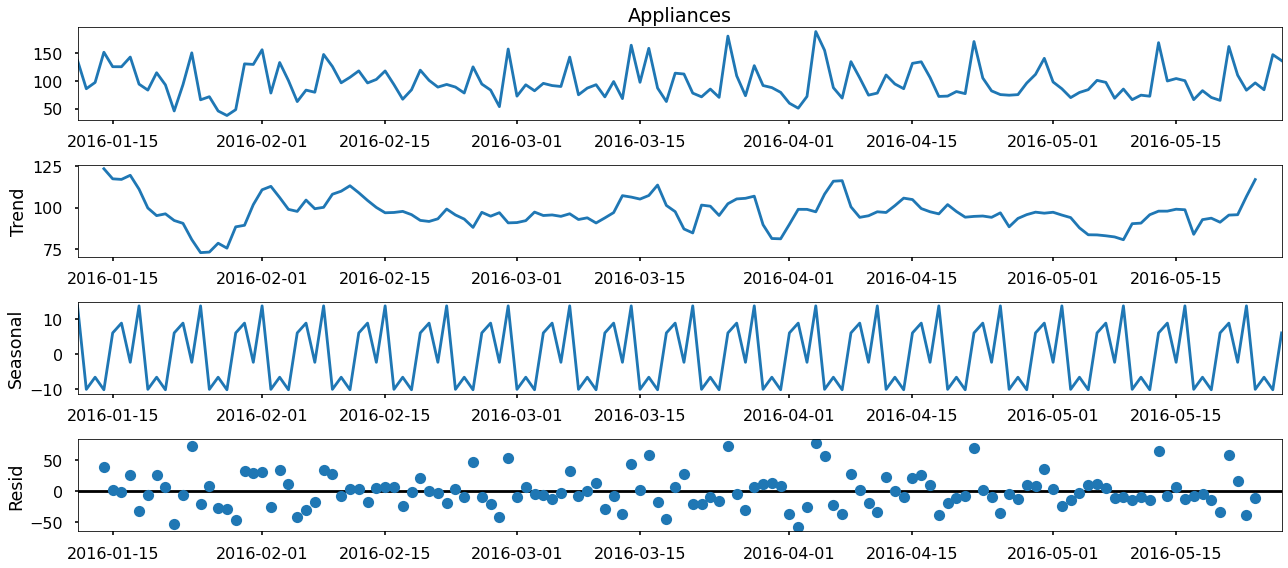

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Appliances, model='additive')
fig = decomposition.plot()
plt.show()

In [46]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1658.7532763969257
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1428.6726154060061
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1313.1647659322539
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1106.9819680789724
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1318.1457992688975
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1246.8123895451533
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1152.4882411221831
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1108.9482703667918
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1541.358763115322
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1359.5348550785536
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1300.6379936358474
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1097.6124476713799
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1315.2894811595938
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1237.244715212393
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1154.3111338739288
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1099.5876716944963
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1393.4310643175713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1273.77788639

In [48]:
mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    154.478     -0.006      0.995    -303.771     301.771
ar.S.L12      -0.1437      0.094     -1.526      0.127      -0.328       0.041
sigma2       907.5967    1.4e+05      0.006      0.995   -2.74e+05    2.76e+05


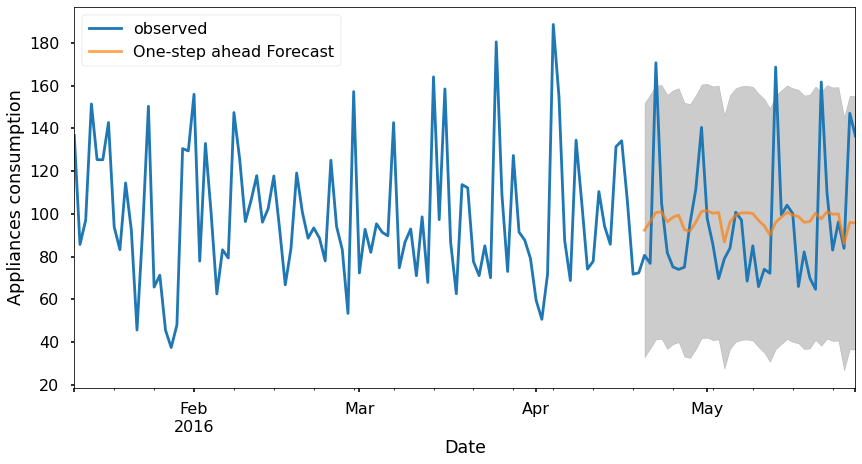

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-20'), dynamic=False)
pred_ci = pred.conf_int()

ax = df.Appliances['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')
plt.legend()

plt.show()

In [51]:
y_forecasted = pred.predicted_mean
y_truth = df.Appliances['2016-04-20':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 803.0


In [52]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.value, order=(1,1,2))
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

AttributeError: 'DataFrame' object has no attribute 'value'

In [53]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.Appliances, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Appliances   No. Observations:                  137
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -663.466
Method:                       css-mle   S.D. of innovations             30.161
Date:                Fri, 14 May 2021   AIC                           1336.932
Time:                        21:33:40   BIC                           1351.532
Sample:                    01-12-2016   HQIC                          1342.865
                         - 05-27-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0349      0.071     -0.489      0.625      -0.175       0.105
ar.L1.D.Appliances    -0.2643      0.450     -0.588      0.557      -1.146       0.617
ma.L1.D.Appliances  

In [54]:
model = ARIMA(df.Appliances, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Appliances   No. Observations:                  137
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -663.887
Method:                       css-mle   S.D. of innovations             30.260
Date:                Fri, 14 May 2021   AIC                           1335.774
Time:                        21:33:51   BIC                           1347.454
Sample:                    01-12-2016   HQIC                          1340.520
                         - 05-27-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0340      0.073     -0.465      0.642      -0.177       0.109
ar.L1.D.Appliances     0.1176      0.086      1.367      0.171      -0.051       0.286
ma.L1.D.Appliances  

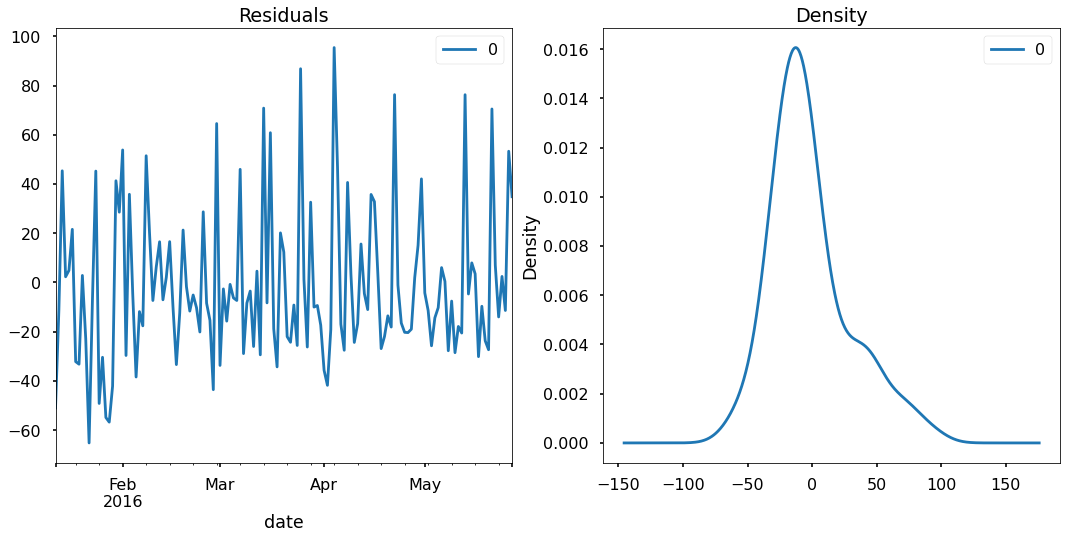

In [55]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

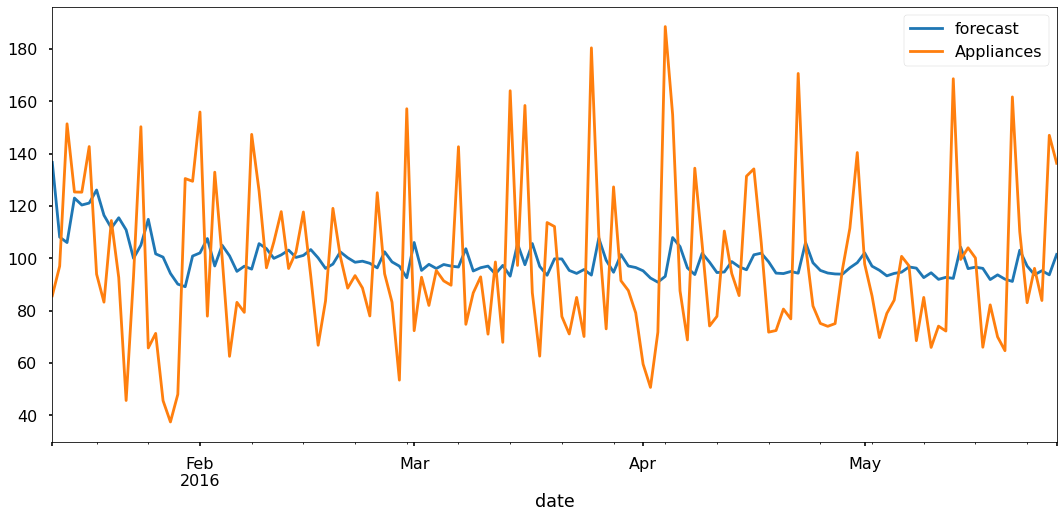

In [56]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [57]:
from statsmodels.tsa.stattools import acf

train = df.value[:85]
test = df.value[85:]

AttributeError: 'DataFrame' object has no attribute 'value'

In [58]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Appliances[:85]
test = df.Appliances[85:]

In [59]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: Length of passed values is 15, index implies 53.

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(25,10), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(25,10), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(45,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(55,45), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [49]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(55,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'ARIMA' is not defined

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
pip install pmdarima

In [ ]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,

In [ ]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

In [ ]:
model = pm.auto_arima(df.Appliances, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
model.plot_diagnostics(figsize=(52,20))
plt.show()

In [ ]:
model.plot_diagnostics(figsize=(32,20))
plt.show()

In [ ]:
model.plot_diagnostics(figsize=(22,20))
plt.show()

In [ ]:
model.plot_diagnostics(figsize=(12,20))
plt.show()

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [60]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Appliances)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

TypeError: predict() got an unexpected keyword argument 'n_periods'

In [61]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Appliances), len(df.Appliances)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Appliances)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

TypeError: predict() got an unexpected keyword argument 'n_periods'

NameError: name 'AutoReg' is not defined

In [63]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
model = AutoReg(df.Appliances, lags=1)
model_fit = model.fit(disp=0)
print(model_fit.summary())

TypeError: fit() got an unexpected keyword argument 'disp'

In [64]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
model = AutoReg(df.Appliances, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

TypeError: __init__() got an unexpected keyword argument 'order'

In [1]:
bar_metrics(resultsDict)

NameError: name 'bar_metrics' is not defined

In [2]:
import pickle
import warnings

import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

from utils.plots import bar_metrics


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('results/scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

# Load our results from the model notebook
with open('results/predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

ModuleNotFoundError: No module named 'utils'